In [1]:
# All imports
from Imports import *
from Preprocessing import *
from Plotting import *
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Load dataset and device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
tornado_data = '../data/jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5'

print(tornado_data.keys())

<KeysViewHDF5 ['image', 'jet_delta_R', 'jet_eta', 'jet_mass', 'jet_phi', 'jet_pt', 'signal', 'tau_1', 'tau_2', 'tau_21', 'tau_3', 'tau_32']>
(872666, 25, 25)


In [3]:
# Binary DN without Quantum Layer
class BinaryDNN(nn.Module):
    def __init__(self):
        super().__init__()

        # Encodes features from dataset
        self.feature_encoder = nn.Sequential(
            nn.Linear(8, 64),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.2),
            nn.Linear(64, 128),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.2),
        )

        # Classifies based on encoded features
        self.classifier = nn.Sequential(
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.2),
            nn.Linear(64, 4),
            nn.Sigmoid()
        )

    def forward(self, img, features):
        feat_encoded = self.feature_encoder(features)
        class_probs = self.classifier(feats_encoded)

        return class_probs  # Shape: (batch_size, 4)

Image shape: torch.Size([872666, 16, 16])
dR Mean: torch.Size([872666])
dR STD: torch.Size([872666])
Pixel Mean: torch.Size([872666])
Pixel STD: torch.Size([872666])
ΔR min: 0.0
ΔR max: 2.4713454246520996
ΔR mean min: 0.003572926390916109
ΔR mean max: 0.015763528645038605
ΔR std min: 0.017520317807793617
ΔR std max: 0.16022197902202606
Weights (pixel intensity) min: 0.0
Weights (pixel intensity) max: 1.0
Pixel mean min: 0.0028264394495636225
Pixel mean max: 0.004322932101786137
Pixel std min: 0.008012386038899422
Pixel std max: 0.06249340996146202


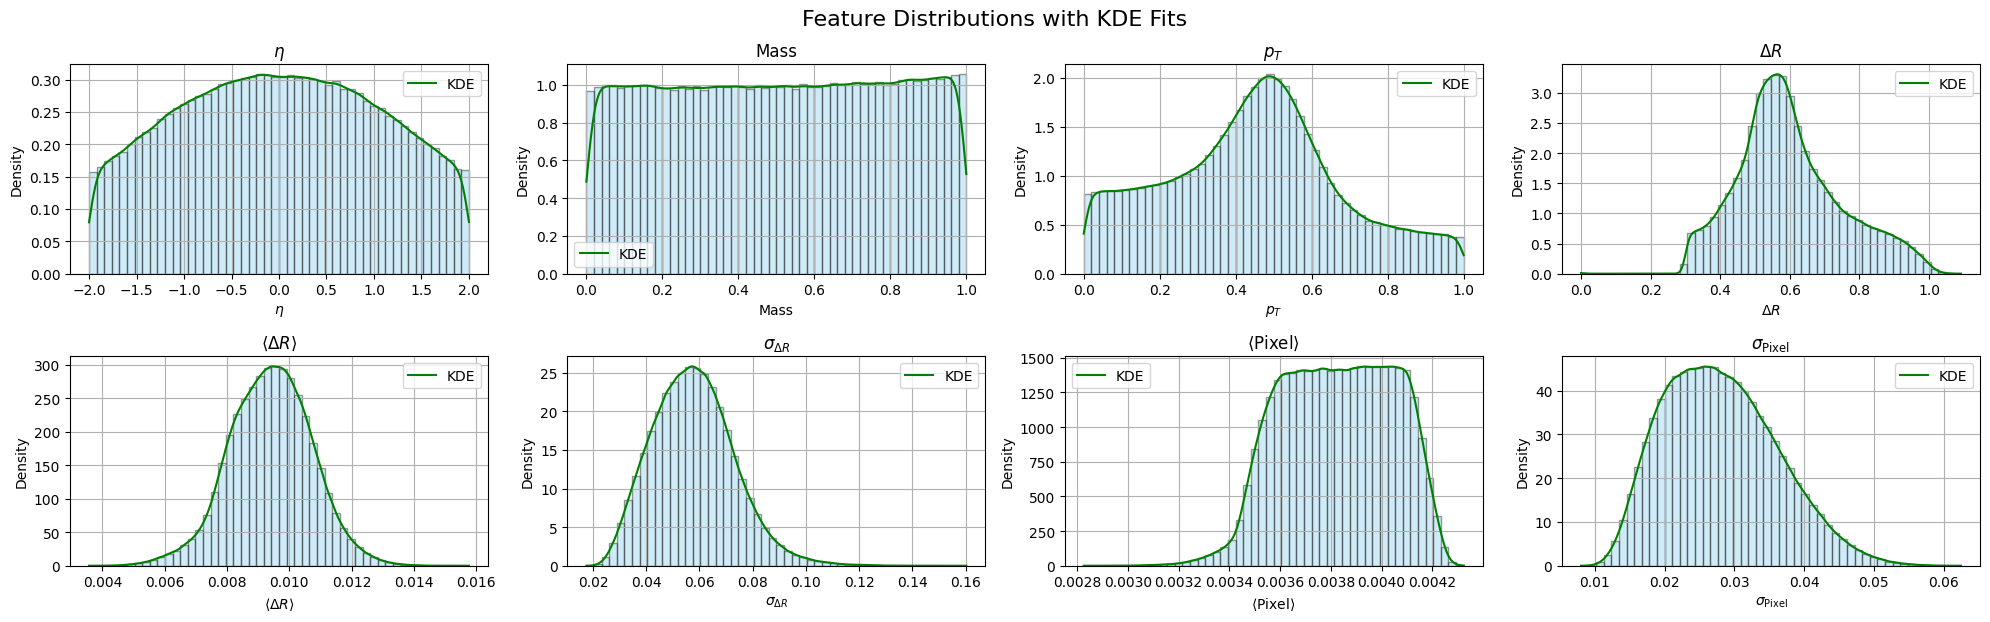

Number of samples: 872666
Image shape: torch.Size([872666, 16, 16])
Feature shape: torch.Size([872666, 9])


In [4]:
# Define variables and train/test datasets
batch_size = 64
lr = 1e-3
n_epochs = 100

train_data = Dataset(X_train, y_train)
test_data = Dataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

train_data = Dataset(tornado_data_train)
test_dataset = Dataset(tornado_data_validation)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

print("Number of samples:", len(dataset))
print("Feature shape:", dataset.features.shape)

In [5]:
# Initialize model, optimizer, and scheduler
DNN = DNN.to(device)
optimizer = optim.Adam(DNN.parameters(), lr=lr, betas=(0.9, 0.999))
scheduler_G = CosineAnnealingLR(optimizer, T_max=n_epochs, eta_min=1e-4)

# Empty array to 
losses = []

In [1]:
# # Plot visual of DNN
# graph =  draw_graph(
#     DNN,
#     input_size=(1, 9),
#     expand_nested=True,
#     depth = 1,
#     graph_name="Discriminator Architecture",
#     mode = 'train',
#     show_shapes = True,
#     hide_inner_tensors=True,
#     roll=True,
#     save_graph=False,
#     graph_dir= "TB",    # Layout: TB (top-bottom), LR (left-right)
# )

# # Show in notebook
# graph.visual_graph

In [15]:
## Load a previous model
load = False

if load:
    # load_path = "models/Binary_DNN_" # Path to load model
    
    # Load the checkpoint
    checkpoint = torch.load(load_path)
    
    # Restore model weights
    DNN.load_state_dict(checkpoint["DNN_state_dict"])
    discriminator.load_state_dict(checkpoint["discriminator_state_dict"])
    
    # Optionally restore tracking data
    losses = checkpoint["losses"]
    d_losses = checkpoint["d_losses"]
    
    stats_dict = checkpoint["stats_dict"]
    
    print(f"Loaded model from {load_path}")

Loaded model from models/class_gan_model_m21_1003.pt


[Epoch 1/100] [D loss: 0.4625] [G loss: 2.0061] [Validity_loss: 1.3512] 
 [Stat_loss: 0.5521] [NNZ_loss: 0.1027]
Sample feature coding: [1.         1.1489165  0.12710255 0.97857755 0.3725121  0.01030809
 0.07017044 0.00397178 0.03119163]


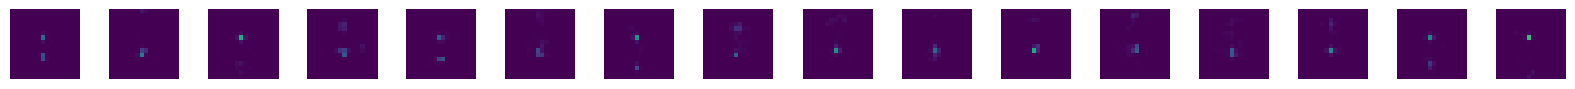

Model and statistics saved to models/class_gan_model_temp.pt
[Epoch 2/100] [D loss: 0.4750] [G loss: 1.7961] [Validity_loss: 1.2852] 
 [Stat_loss: 0.4288] [NNZ_loss: 0.0821]
Sample feature coding: [1.         0.02674955 0.76959884 0.65378577 0.34881806 0.00861948
 0.05257626 0.00364341 0.03135144]


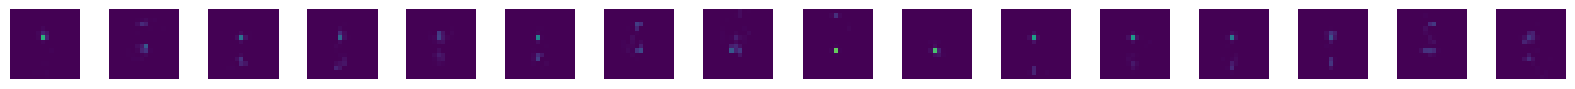

[Epoch 3/100] [D loss: 0.4821] [G loss: 1.5265] [Validity_loss: 1.0248] 
 [Stat_loss: 0.4067] [NNZ_loss: 0.0949]
Sample feature coding: [ 0.         -0.9400151   0.5017934   0.45171013  0.49361527  0.00912952
  0.07211197  0.00371723  0.02307872]


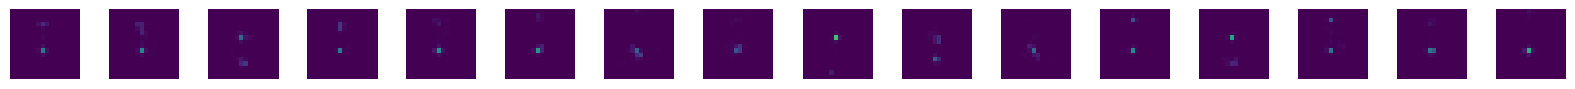

[Epoch 4/100] [D loss: 0.4298] [G loss: 1.8663] [Validity_loss: 1.3441] 
 [Stat_loss: 0.4413] [NNZ_loss: 0.0809]
Sample feature coding: [1.         1.2563007  0.42591563 0.2662887  0.62229276 0.00936818
 0.06935579 0.00412681 0.02905866]


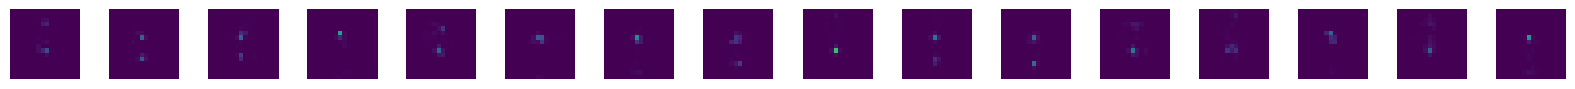

[Epoch 5/100] [D loss: 0.5051] [G loss: 1.7719] [Validity_loss: 1.2975] 
 [Stat_loss: 0.3755] [NNZ_loss: 0.0989]
Sample feature coding: [ 0.         -1.0731415   0.9401846   0.34261277  0.47149613  0.00839558
  0.07107509  0.00411527  0.03563651]


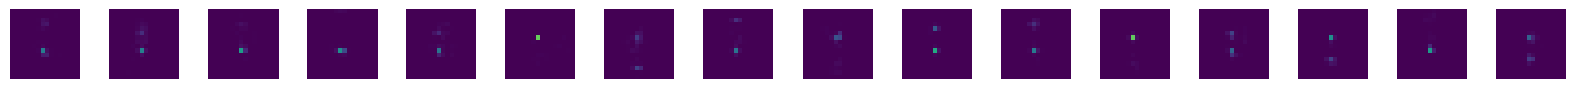

[Epoch 6/100] [D loss: 0.4647] [G loss: 1.9037] [Validity_loss: 1.4135] 
 [Stat_loss: 0.4119] [NNZ_loss: 0.0783]
Sample feature coding: [1.         0.9793392  0.85974485 0.30764535 0.51268375 0.00898214
 0.06950005 0.00381479 0.02906147]


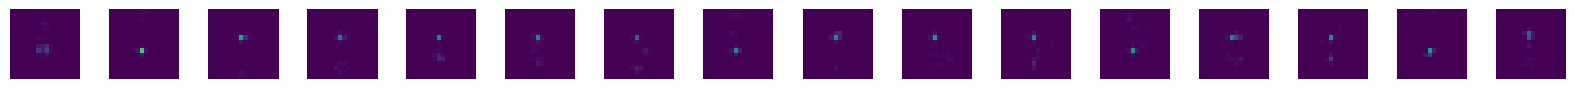

[Epoch 7/100] [D loss: 0.4658] [G loss: 1.9235] [Validity_loss: 1.4437] 
 [Stat_loss: 0.3781] [NNZ_loss: 0.1018]
Sample feature coding: [ 1.         -1.185474    0.7826402   0.1097874   0.60549     0.01060013
  0.06639241  0.00370525  0.02663294]


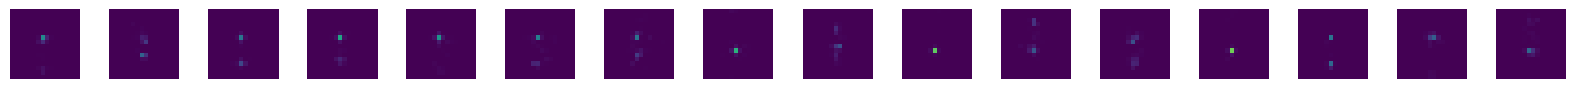

[Epoch 8/100] [D loss: 0.4580] [G loss: 1.7780] [Validity_loss: 1.2644] 
 [Stat_loss: 0.4426] [NNZ_loss: 0.0709]
Sample feature coding: [ 0.         -0.5622319   0.70875645  0.43496707  0.7428615   0.00913538
  0.02871065  0.00357109  0.02485589]


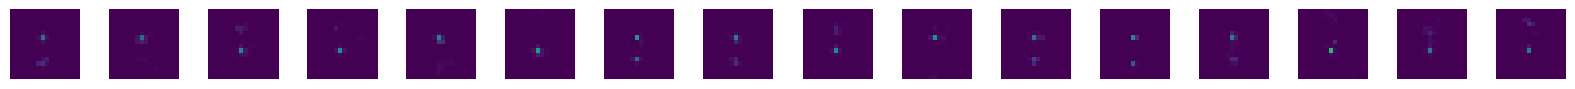

[Epoch 9/100] [D loss: 0.4975] [G loss: 1.7742] [Validity_loss: 1.2289] 
 [Stat_loss: 0.4592] [NNZ_loss: 0.0861]
Sample feature coding: [ 0.         -1.6636617   0.5128811   0.46115053  0.55107725  0.01068843
  0.04369477  0.00369691  0.03415675]


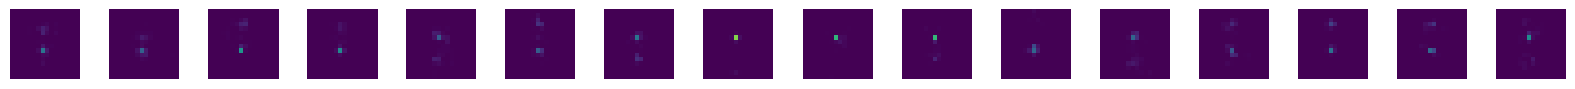

[Epoch 10/100] [D loss: 0.4649] [G loss: 1.8747] [Validity_loss: 1.3079] 
 [Stat_loss: 0.4622] [NNZ_loss: 0.1046]
Sample feature coding: [ 0.          1.2381554   0.0625677  -0.00963682  0.6833557   0.00815177
  0.08767121  0.00372108  0.03397734]


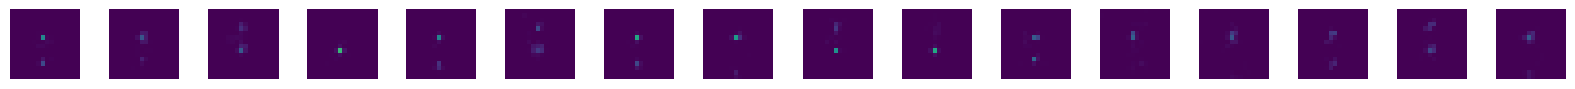

[Epoch 11/100] [D loss: 0.5109] [G loss: 2.0211] [Validity_loss: 1.4451] 
 [Stat_loss: 0.4924] [NNZ_loss: 0.0837]
Sample feature coding: [ 0.         -0.6687406   0.00583141  0.5008594   0.51354843  0.00941118
  0.0473825   0.00407527  0.03434204]


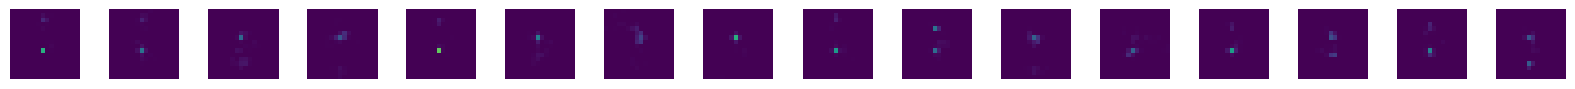

Model and statistics saved to models/class_gan_model_temp.pt
[Epoch 12/100] [D loss: 0.4698] [G loss: 2.0335] [Validity_loss: 1.4608] 
 [Stat_loss: 0.4816] [NNZ_loss: 0.0912]
Sample feature coding: [ 0.         -0.24571565  0.42485088  0.5587351   0.5719544   0.01014716
  0.0724576   0.00415318  0.04225377]


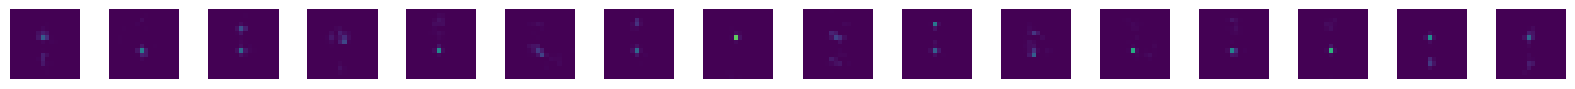

[Epoch 13/100] [D loss: 0.5159] [G loss: 1.7927] [Validity_loss: 1.2753] 
 [Stat_loss: 0.4261] [NNZ_loss: 0.0914]
Sample feature coding: [0.         0.15126896 0.83095235 0.51306015 0.59501773 0.00818156
 0.08936611 0.0041902  0.02623601]


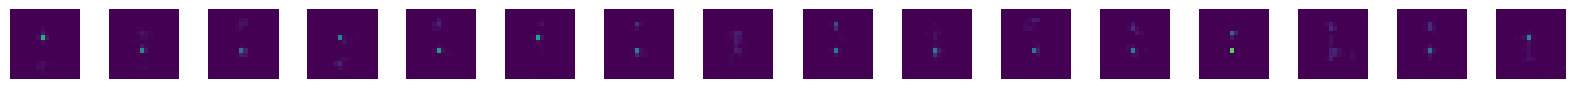

[Epoch 14/100] [D loss: 0.4942] [G loss: 1.8018] [Validity_loss: 1.2047] 
 [Stat_loss: 0.4739] [NNZ_loss: 0.1232]
Sample feature coding: [1.         1.618586   0.5909971  0.12912188 0.7435141  0.0097144
 0.04206513 0.00390523 0.04087705]


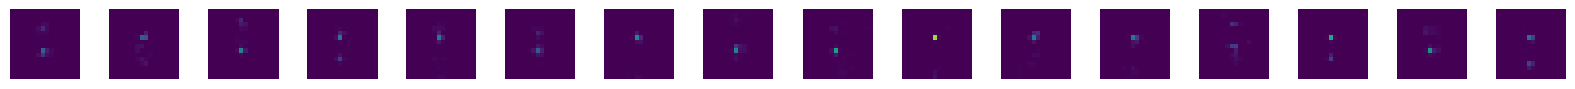

[Epoch 15/100] [D loss: 0.4783] [G loss: 1.8432] [Validity_loss: 1.2329] 
 [Stat_loss: 0.5281] [NNZ_loss: 0.0821]
Sample feature coding: [ 1.         -1.5082217   0.44312072  0.19666563  0.49422163  0.0094584
  0.05496233  0.0038774   0.02357908]


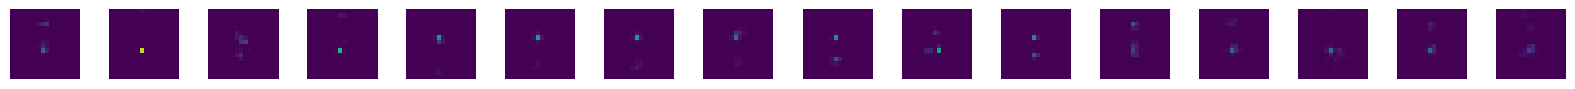

[Epoch 16/100] [D loss: 0.4317] [G loss: 1.6817] [Validity_loss: 1.2710] 
 [Stat_loss: 0.3168] [NNZ_loss: 0.0939]
Sample feature coding: [0.         0.461137   0.92925346 0.42130986 0.90581894 0.00688702
 0.06751449 0.00410758 0.03897922]


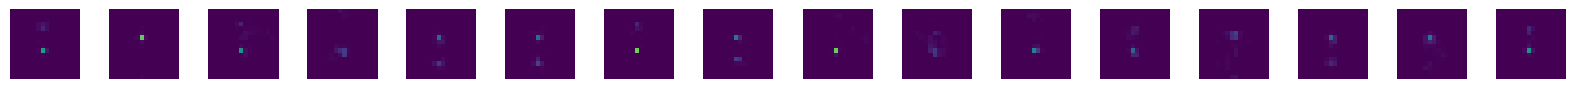

[Epoch 17/100] [D loss: 0.4707] [G loss: 1.7756] [Validity_loss: 1.1691] 
 [Stat_loss: 0.5145] [NNZ_loss: 0.0920]
Sample feature coding: [ 0.         -1.2781701   0.8109001   0.14327192  0.573004    0.00852662
  0.0512396   0.00399564  0.02158516]


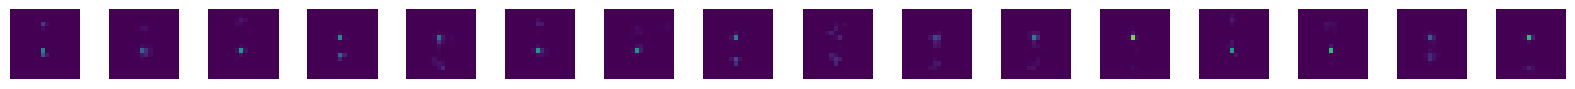

[Epoch 18/100] [D loss: 0.4606] [G loss: 1.7593] [Validity_loss: 1.3241] 
 [Stat_loss: 0.3485] [NNZ_loss: 0.0866]
Sample feature coding: [1.         1.0751679  0.9411004  0.2822227  0.51234037 0.00895157
 0.07165036 0.0036817  0.02164262]


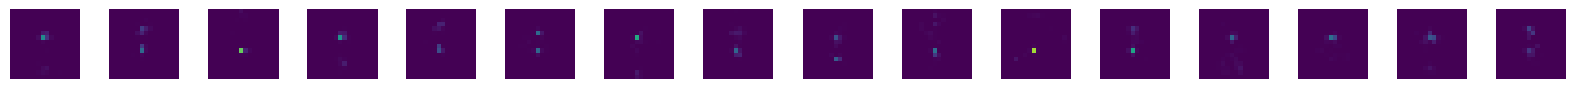

[Epoch 19/100] [D loss: 0.4602] [G loss: 1.7753] [Validity_loss: 1.2529] 
 [Stat_loss: 0.4082] [NNZ_loss: 0.1142]
Sample feature coding: [0.         0.44818607 0.04921715 0.42467937 0.4462285  0.01197256
 0.1071361  0.00363711 0.03177513]


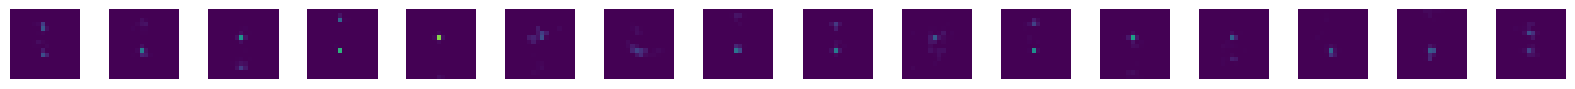

[Epoch 20/100] [D loss: 0.4330] [G loss: 1.9119] [Validity_loss: 1.3170] 
 [Stat_loss: 0.4838] [NNZ_loss: 0.1111]
Sample feature coding: [ 1.         -1.9556069   0.46780565  0.9331436   0.90331715  0.00906647
  0.05202245  0.00390113  0.01876041]


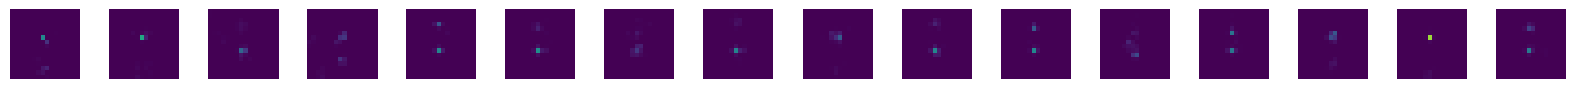

[Epoch 21/100] [D loss: 0.4687] [G loss: 1.7231] [Validity_loss: 1.2513] 
 [Stat_loss: 0.3945] [NNZ_loss: 0.0774]
Sample feature coding: [ 1.         -0.27657637  0.7907187   0.5385742   0.84018576  0.00902132
  0.06293355  0.00392746  0.01682616]


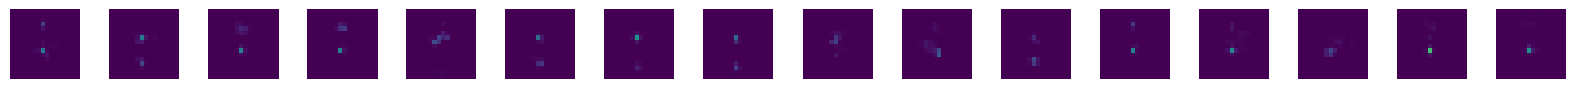

Model and statistics saved to models/class_gan_model_temp.pt
[Epoch 22/100] [D loss: 0.4740] [G loss: 1.6851] [Validity_loss: 1.1865] 
 [Stat_loss: 0.4165] [NNZ_loss: 0.0822]
Sample feature coding: [1.         1.4079517  0.6831039  0.5551415  0.8153904  0.01109986
 0.06997012 0.00362224 0.04329109]


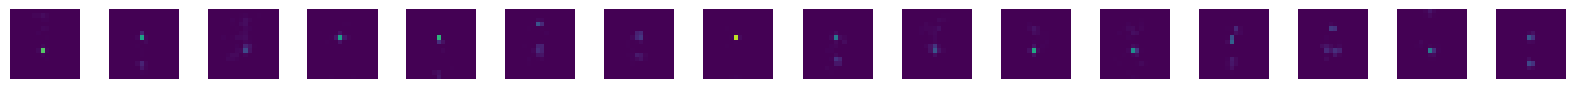

[Epoch 23/100] [D loss: 0.4929] [G loss: 1.7160] [Validity_loss: 1.2072] 
 [Stat_loss: 0.4057] [NNZ_loss: 0.1030]
Sample feature coding: [ 1.         -1.9079982   0.54974365  0.5983084   0.44055837  0.00581815
  0.08423158  0.00351135  0.03104006]


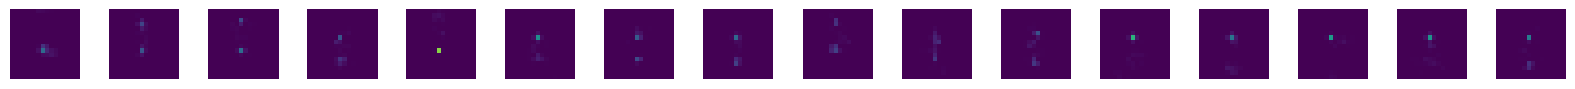

[Epoch 24/100] [D loss: 0.4617] [G loss: 1.8622] [Validity_loss: 1.3770] 
 [Stat_loss: 0.3874] [NNZ_loss: 0.0979]
Sample feature coding: [1.         0.22622631 0.32306996 0.94684964 0.44744104 0.01221016
 0.07170203 0.00390978 0.04658157]


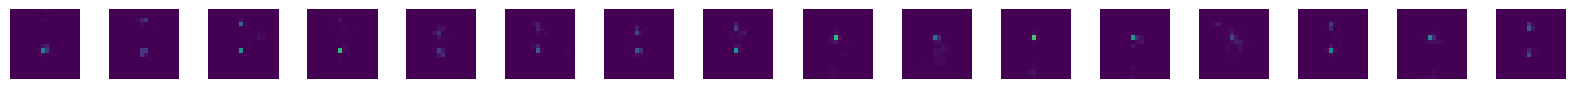

[Epoch 25/100] [D loss: 0.4957] [G loss: 1.7605] [Validity_loss: 1.2815] 
 [Stat_loss: 0.3807] [NNZ_loss: 0.0983]
Sample feature coding: [0.         1.7067837  0.56752497 0.9434626  0.38812494 0.00966831
 0.07413732 0.00362221 0.02293682]


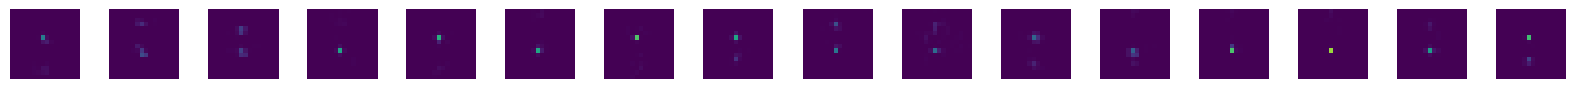

[Epoch 26/100] [D loss: 0.4953] [G loss: 1.7532] [Validity_loss: 1.2297] 
 [Stat_loss: 0.4183] [NNZ_loss: 0.1052]
Sample feature coding: [1.         1.0309428  0.5276233  0.6503841  0.3382745  0.01071181
 0.06397329 0.0036518  0.02860609]


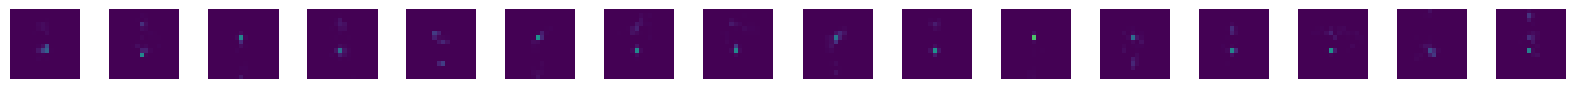

[Epoch 27/100] [D loss: 0.4892] [G loss: 1.7486] [Validity_loss: 1.2804] 
 [Stat_loss: 0.3851] [NNZ_loss: 0.0831]
Sample feature coding: [0.         1.3569818  0.7753665  0.37761933 0.6403742  0.00992241
 0.04964994 0.00417266 0.02779611]


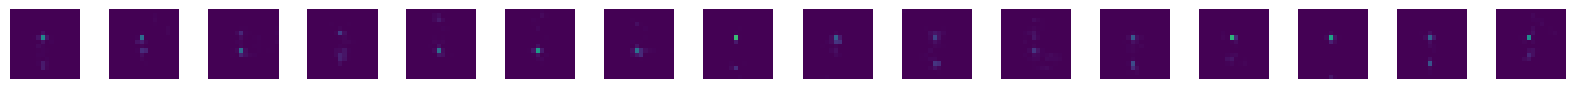

[Epoch 28/100] [D loss: 0.4845] [G loss: 1.7758] [Validity_loss: 1.2868] 
 [Stat_loss: 0.3997] [NNZ_loss: 0.0893]
Sample feature coding: [ 0.         -1.0809786   0.7349937   0.50659436  0.7323152   0.00845648
  0.05961994  0.00357726  0.03060717]


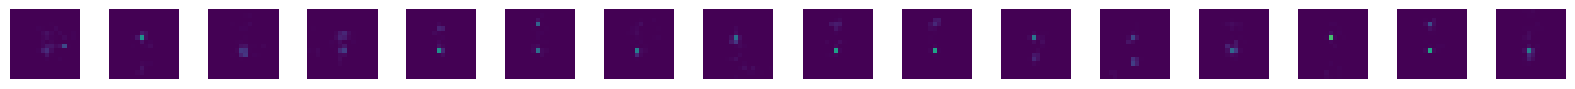

[Epoch 29/100] [D loss: 0.4623] [G loss: 1.6701] [Validity_loss: 1.2459] 
 [Stat_loss: 0.3369] [NNZ_loss: 0.0873]
Sample feature coding: [ 1.         -1.4173949   0.99399346  0.4368962   0.4360881   0.00942503
  0.05611391  0.00410695  0.03101925]


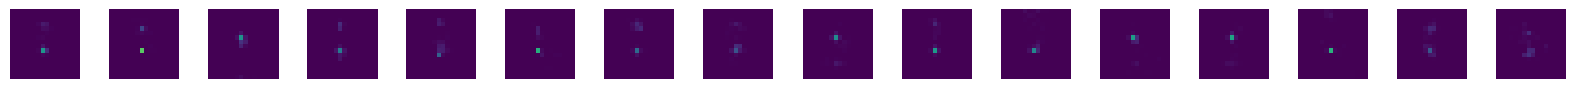

[Epoch 30/100] [D loss: 0.4573] [G loss: 1.7738] [Validity_loss: 1.2931] 
 [Stat_loss: 0.4022] [NNZ_loss: 0.0785]
Sample feature coding: [ 0.         -0.9994363   0.14535846  0.6936752   0.58789414  0.00967366
  0.04469211  0.00389747  0.01646604]


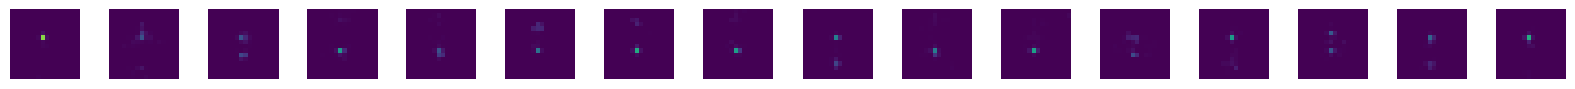

[Epoch 31/100] [D loss: 0.4741] [G loss: 1.7009] [Validity_loss: 1.1844] 
 [Stat_loss: 0.4251] [NNZ_loss: 0.0915]
Sample feature coding: [ 0.         -1.0392206   0.77254343  0.3092045   0.74977076  0.00590502
  0.08322693  0.00402751  0.0417388 ]


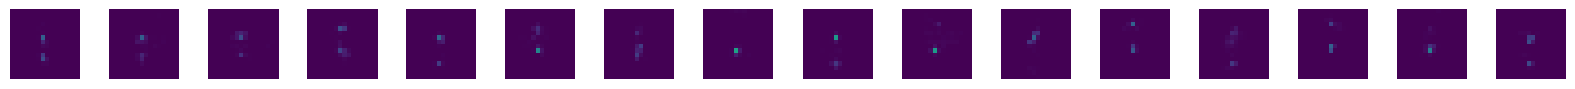

Model and statistics saved to models/class_gan_model_temp.pt
[Epoch 32/100] [D loss: 0.5189] [G loss: 1.7355] [Validity_loss: 1.2915] 
 [Stat_loss: 0.3600] [NNZ_loss: 0.0840]
Sample feature coding: [1.         0.5043692  0.15462437 0.69667304 0.51614356 0.00850227
 0.06596491 0.00405738 0.02646351]


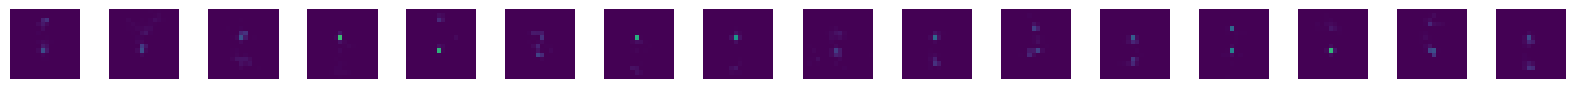

[Epoch 33/100] [D loss: 0.4691] [G loss: 1.6856] [Validity_loss: 1.2650] 
 [Stat_loss: 0.3273] [NNZ_loss: 0.0933]
Sample feature coding: [1.         0.19044691 0.2148812  0.44446486 0.3436319  0.00955718
 0.04587907 0.00397158 0.02033033]


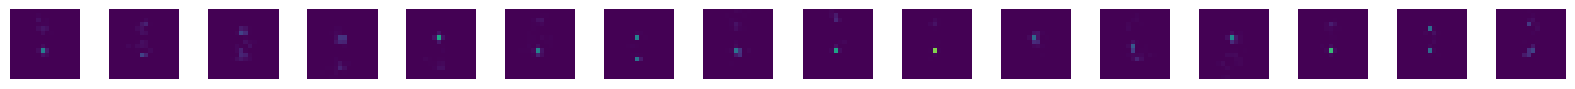

[Epoch 34/100] [D loss: 0.4516] [G loss: 1.8570] [Validity_loss: 1.3301] 
 [Stat_loss: 0.4435] [NNZ_loss: 0.0834]
Sample feature coding: [ 0.         -1.1963007   0.8270588   0.03373675  0.57781875  0.01137778
  0.05852186  0.00348514  0.04177172]


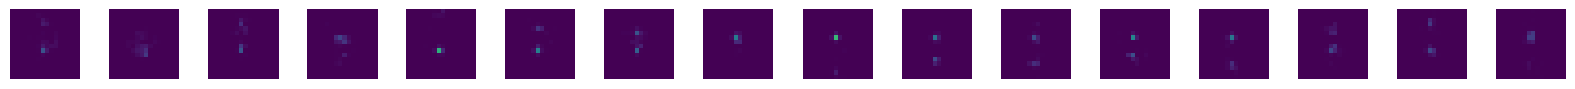

[Epoch 35/100] [D loss: 0.5113] [G loss: 1.6754] [Validity_loss: 1.1951] 
 [Stat_loss: 0.3783] [NNZ_loss: 0.1020]
Sample feature coding: [ 0.         -0.45132083  0.84699714  0.0896946   0.46061146  0.0099532
  0.03089648  0.00350636  0.03456363]


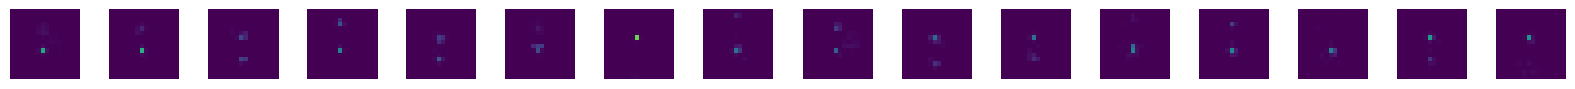

[Epoch 36/100] [D loss: 0.4793] [G loss: 1.8114] [Validity_loss: 1.2270] 
 [Stat_loss: 0.4891] [NNZ_loss: 0.0954]
Sample feature coding: [0.         0.8754672  0.31194204 0.8931794  0.66409564 0.01097351
 0.07632878 0.00397171 0.02989988]


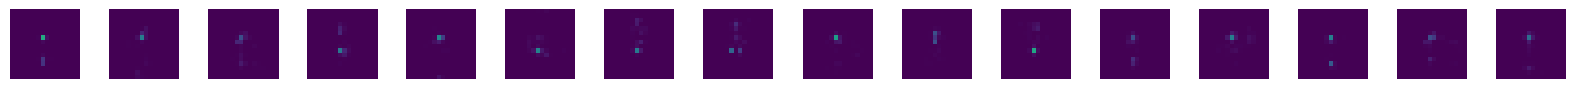

[Epoch 37/100] [D loss: 0.5260] [G loss: 1.8087] [Validity_loss: 1.3268] 
 [Stat_loss: 0.4015] [NNZ_loss: 0.0804]
Sample feature coding: [ 1.         -0.21275122  0.31439668  0.29306433  0.8729269   0.0109876
  0.03909054  0.00362203  0.01415868]


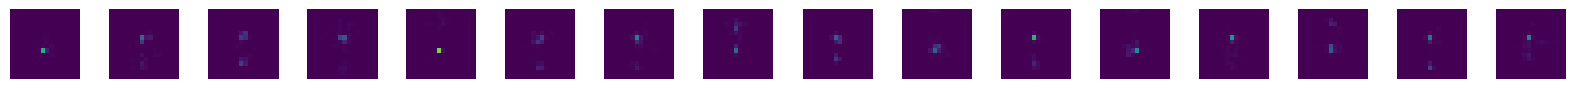

[Epoch 38/100] [D loss: 0.5035] [G loss: 1.8704] [Validity_loss: 1.3372] 
 [Stat_loss: 0.4314] [NNZ_loss: 0.1019]
Sample feature coding: [0.         0.928312   0.72469676 0.5465122  0.72188514 0.00595676
 0.04637886 0.00358632 0.031999  ]


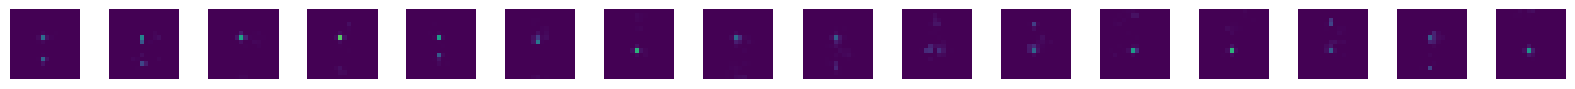

[Epoch 39/100] [D loss: 0.4534] [G loss: 1.9826] [Validity_loss: 1.3928] 
 [Stat_loss: 0.4908] [NNZ_loss: 0.0991]
Sample feature coding: [0.         0.73837763 0.01340474 0.03179498 0.7218022  0.00847743
 0.07927727 0.00360953 0.01602355]


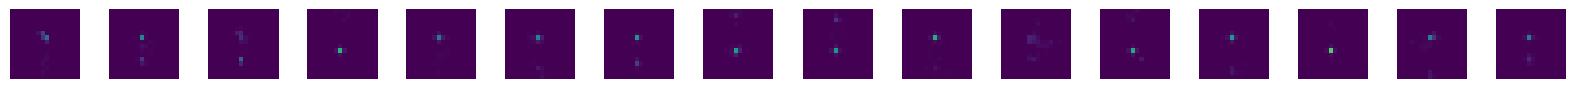

[Epoch 40/100] [D loss: 0.4477] [G loss: 1.7092] [Validity_loss: 1.2201] 
 [Stat_loss: 0.3978] [NNZ_loss: 0.0913]
Sample feature coding: [ 1.         -1.8657933   0.06190736  0.09621861  0.52201724  0.00932092
  0.06537606  0.00400778  0.0177604 ]


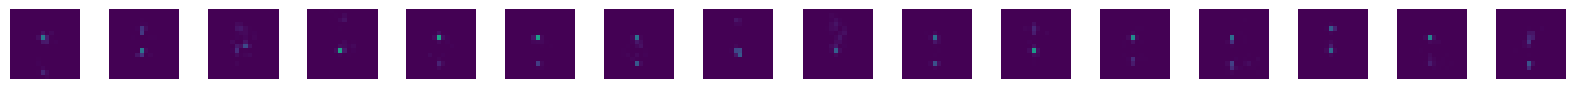

[Epoch 41/100] [D loss: 0.4585] [G loss: 1.8759] [Validity_loss: 1.2857] 
 [Stat_loss: 0.5176] [NNZ_loss: 0.0726]
Sample feature coding: [ 1.         -1.1980282   0.41402027  0.8930069   0.57138586  0.01035101
  0.06714511  0.0037664   0.01623078]


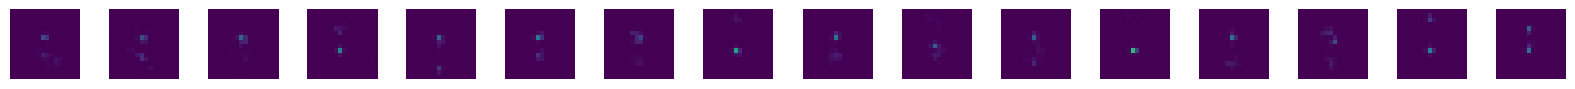

Model and statistics saved to models/class_gan_model_temp.pt
[Epoch 42/100] [D loss: 0.4592] [G loss: 1.6668] [Validity_loss: 1.2330] 
 [Stat_loss: 0.3466] [NNZ_loss: 0.0873]
Sample feature coding: [1.         0.82870096 0.39075223 0.2932545  0.75415355 0.00957945
 0.08370008 0.00414227 0.05641897]


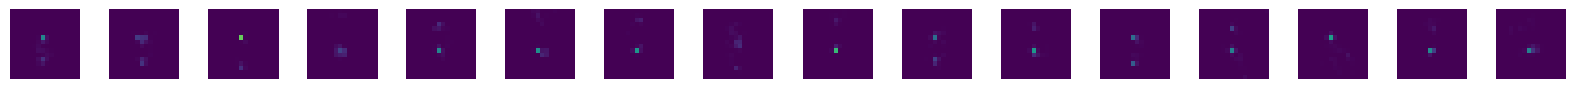

[Epoch 43/100] [D loss: 0.4955] [G loss: 1.6353] [Validity_loss: 1.1341] 
 [Stat_loss: 0.3924] [NNZ_loss: 0.1088]
Sample feature coding: [0.         1.2596706  0.833945   0.2968919  0.5925865  0.00959773
 0.05352844 0.00383038 0.02980113]


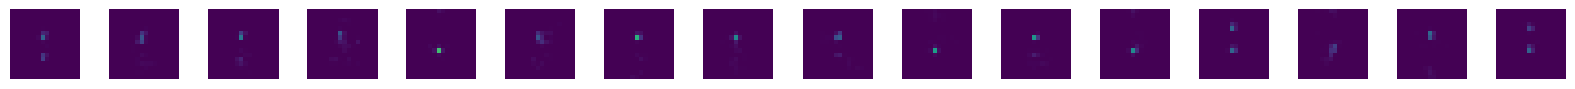

[Epoch 44/100] [D loss: 0.4715] [G loss: 1.6776] [Validity_loss: 1.2649] 
 [Stat_loss: 0.3258] [NNZ_loss: 0.0868]
Sample feature coding: [0.         1.4812018  0.5466927  0.5147672  0.4269963  0.0110342
 0.04056081 0.00382989 0.02820245]


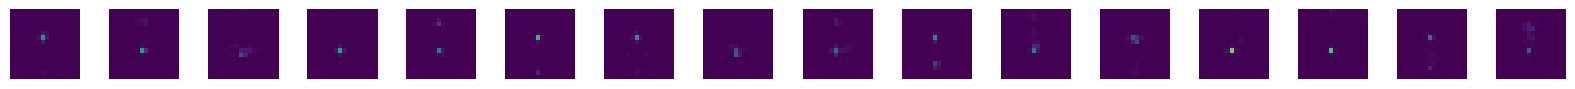

[Epoch 45/100] [D loss: 0.4166] [G loss: 1.8055] [Validity_loss: 1.2735] 
 [Stat_loss: 0.4190] [NNZ_loss: 0.1131]
Sample feature coding: [ 0.         -0.57601345  0.663962    0.30655912  0.58554405  0.01156347
  0.0384832   0.00374225  0.03385044]


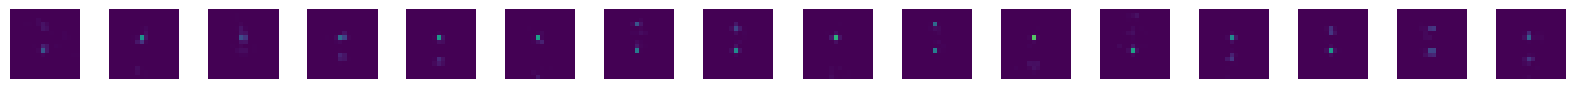

[Epoch 46/100] [D loss: 0.4671] [G loss: 1.8398] [Validity_loss: 1.3838] 
 [Stat_loss: 0.3798] [NNZ_loss: 0.0762]
Sample feature coding: [1.         1.2997055  0.6775115  0.61661845 0.5595047  0.0093921
 0.06301292 0.00422202 0.03202018]


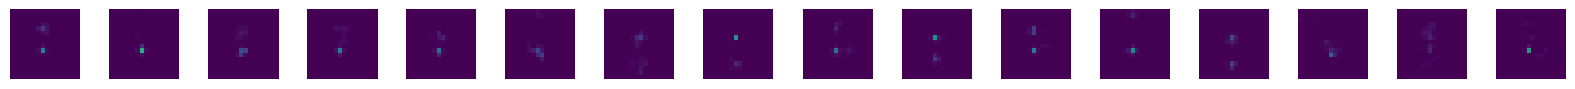

[Epoch 47/100] [D loss: 0.4699] [G loss: 1.9732] [Validity_loss: 1.4335] 
 [Stat_loss: 0.4328] [NNZ_loss: 0.1069]
Sample feature coding: [1.         0.5940814  0.86522186 0.25789237 0.70100003 0.00924157
 0.04644819 0.00360372 0.01967344]


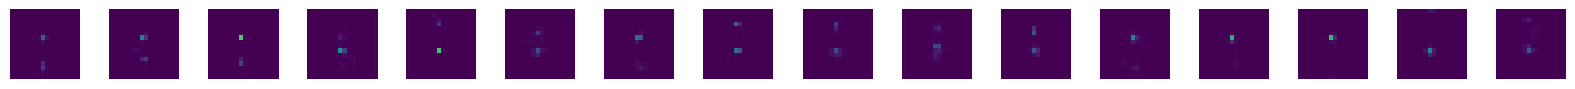

[Epoch 48/100] [D loss: 0.4574] [G loss: 1.8318] [Validity_loss: 1.2963] 
 [Stat_loss: 0.4528] [NNZ_loss: 0.0827]
Sample feature coding: [0.         0.61118346 0.4486662  0.9851163  0.5161523  0.00733472
 0.05999793 0.0038939  0.03126115]


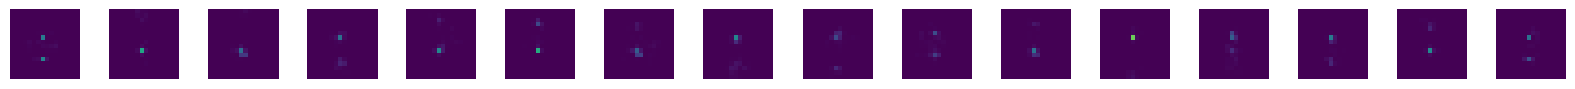

[Epoch 49/100] [D loss: 0.4691] [G loss: 2.0550] [Validity_loss: 1.5013] 
 [Stat_loss: 0.4554] [NNZ_loss: 0.0983]
Sample feature coding: [0.         1.1489345  0.19911824 0.33596125 0.7896862  0.01002086
 0.07224699 0.00347294 0.03733684]


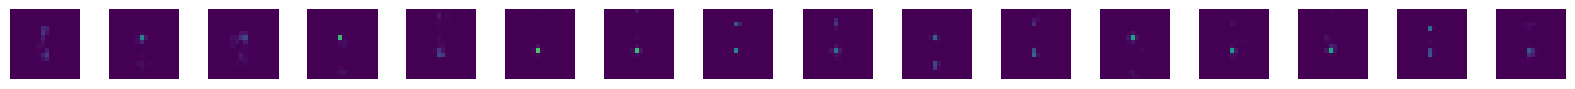

[Epoch 50/100] [D loss: 0.4878] [G loss: 1.7943] [Validity_loss: 1.2862] 
 [Stat_loss: 0.4040] [NNZ_loss: 0.1041]
Sample feature coding: [ 1.         -0.36230686  0.20793676  0.17715077  0.5678835   0.01022914
  0.05213425  0.00391091  0.02658742]


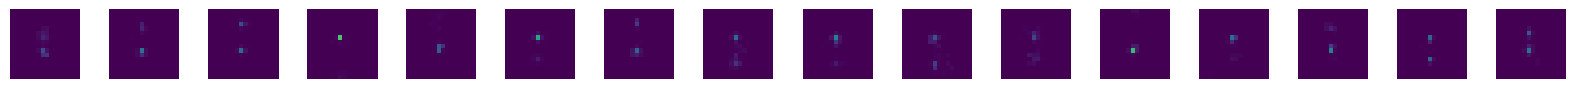

[Epoch 51/100] [D loss: 0.4855] [G loss: 1.7753] [Validity_loss: 1.2891] 
 [Stat_loss: 0.4039] [NNZ_loss: 0.0823]
Sample feature coding: [0.         1.1078666  0.90738535 0.47950223 0.7191122  0.00997835
 0.06224816 0.00387357 0.01905748]


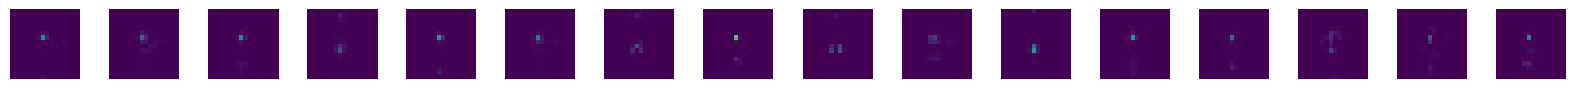

Model and statistics saved to models/class_gan_model_temp.pt
[Epoch 52/100] [D loss: 0.4673] [G loss: 1.8599] [Validity_loss: 1.3608] 
 [Stat_loss: 0.4050] [NNZ_loss: 0.0941]
Sample feature coding: [ 0.         -1.3975284   0.07345121  0.20232975  0.553395    0.00784918
  0.05994294  0.00384709  0.02184622]


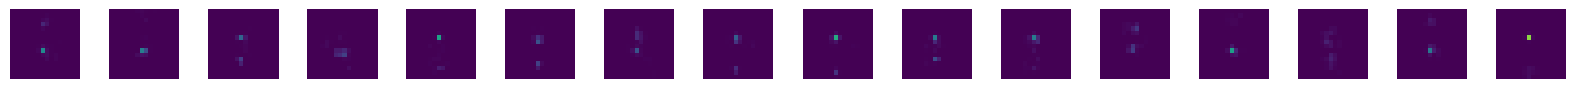

[Epoch 53/100] [D loss: 0.4650] [G loss: 2.0069] [Validity_loss: 1.4210] 
 [Stat_loss: 0.4937] [NNZ_loss: 0.0922]
Sample feature coding: [ 1.         -0.66731477  0.1654267   0.37649167  0.5677166   0.00852025
  0.0458307   0.00387993  0.02538692]


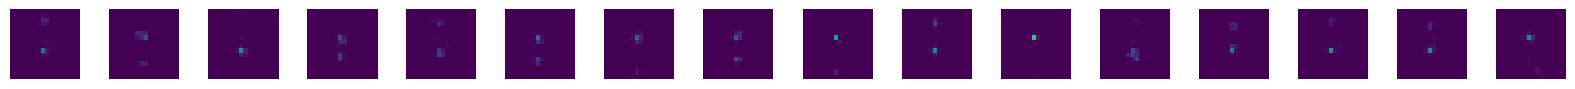

[Epoch 54/100] [D loss: 0.4771] [G loss: 1.9180] [Validity_loss: 1.3581] 
 [Stat_loss: 0.4646] [NNZ_loss: 0.0953]
Sample feature coding: [0.         1.9282327  0.62128735 0.8497309  0.97933084 0.00635517
 0.07585325 0.0036606  0.0205343 ]


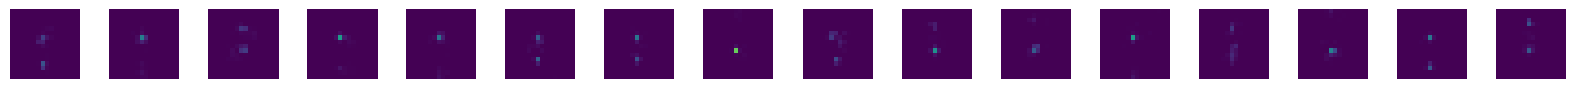

[Epoch 55/100] [D loss: 0.4516] [G loss: 1.7886] [Validity_loss: 1.2464] 
 [Stat_loss: 0.4500] [NNZ_loss: 0.0922]
Sample feature coding: [ 0.         -0.05871905  0.7676412   0.45860782  0.51914126  0.00726488
  0.06428176  0.00361665  0.02450777]


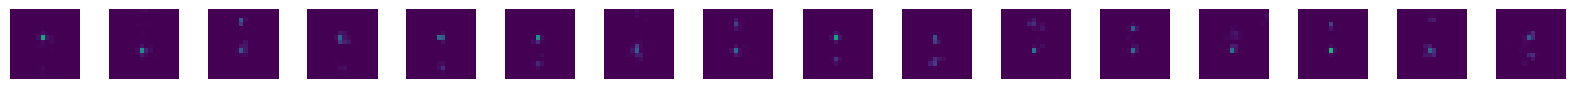

[Epoch 56/100] [D loss: 0.4727] [G loss: 2.0502] [Validity_loss: 1.5089] 
 [Stat_loss: 0.4552] [NNZ_loss: 0.0861]
Sample feature coding: [1.         0.17561306 0.2834876  0.29158777 0.67109644 0.00985965
 0.07037716 0.004095   0.01341186]


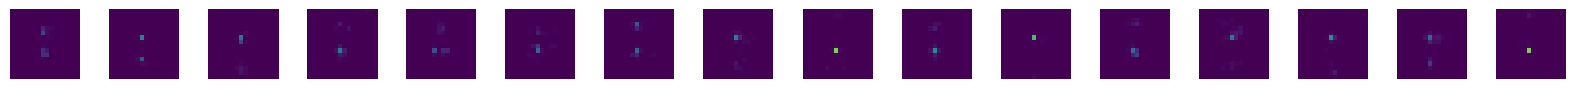

[Epoch 57/100] [D loss: 0.4482] [G loss: 1.8702] [Validity_loss: 1.3572] 
 [Stat_loss: 0.4305] [NNZ_loss: 0.0826]
Sample feature coding: [ 0.         -0.97035056  0.887769    0.14394599  0.4876373   0.01048209
  0.0441194   0.00363992  0.03855797]


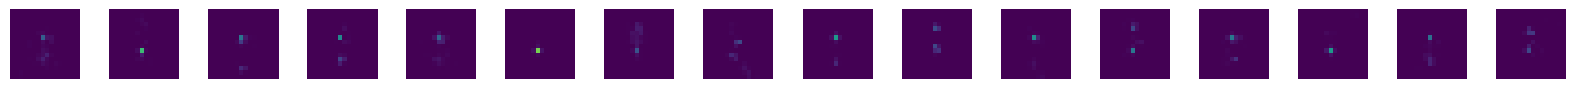

[Epoch 58/100] [D loss: 0.4499] [G loss: 1.9444] [Validity_loss: 1.4509] 
 [Stat_loss: 0.4010] [NNZ_loss: 0.0925]
Sample feature coding: [ 1.         -0.5193816   0.14386566  0.496582    0.57983583  0.01033219
  0.06186589  0.00397726  0.01705002]


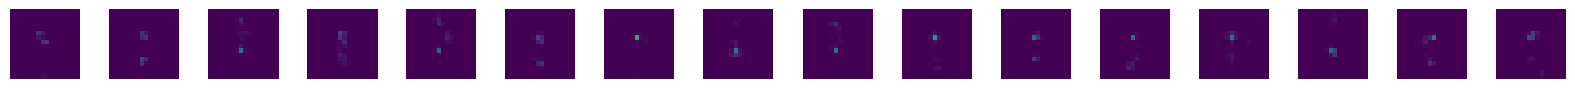

[Epoch 59/100] [D loss: 0.4865] [G loss: 1.8503] [Validity_loss: 1.3105] 
 [Stat_loss: 0.4158] [NNZ_loss: 0.1240]
Sample feature coding: [ 0.         -0.24959353  0.39854434  0.75878066  0.38632113  0.00979034
  0.04211279  0.00369192  0.03599419]


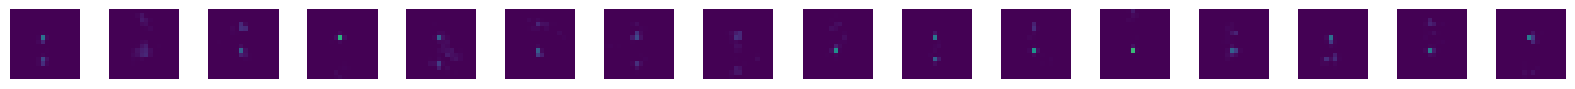

[Epoch 60/100] [D loss: 0.4242] [G loss: 1.9004] [Validity_loss: 1.3779] 
 [Stat_loss: 0.4254] [NNZ_loss: 0.0971]
Sample feature coding: [ 1.         -1.6260738   0.9513227   0.4838333   0.45843056  0.01162209
  0.06331952  0.00368438  0.01772376]


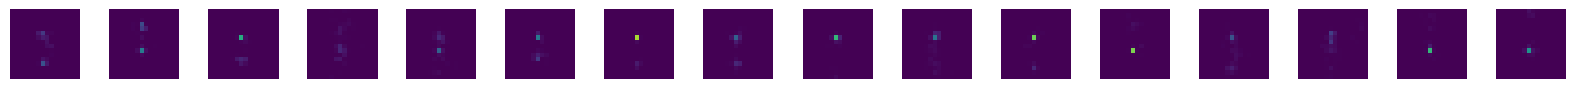

[Epoch 61/100] [D loss: 0.4729] [G loss: 1.9620] [Validity_loss: 1.4260] 
 [Stat_loss: 0.4290] [NNZ_loss: 0.1070]
Sample feature coding: [ 0.         -1.5611361   0.8262627   0.62081164  0.6751265   0.01151939
  0.07184381  0.00385247  0.04935592]


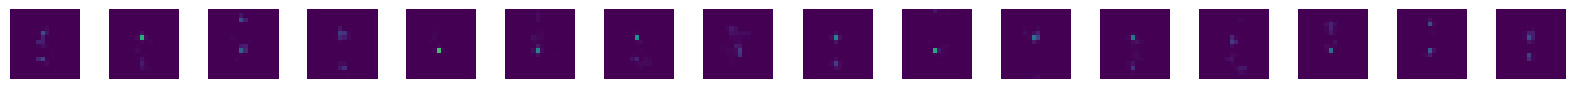

Model and statistics saved to models/class_gan_model_temp.pt
[Epoch 62/100] [D loss: 0.4657] [G loss: 1.9072] [Validity_loss: 1.3893] 
 [Stat_loss: 0.4128] [NNZ_loss: 0.1052]
Sample feature coding: [ 1.         -0.9716494   0.7626229   0.78619546  0.68245095  0.00993054
  0.1093943   0.00391892  0.03393112]


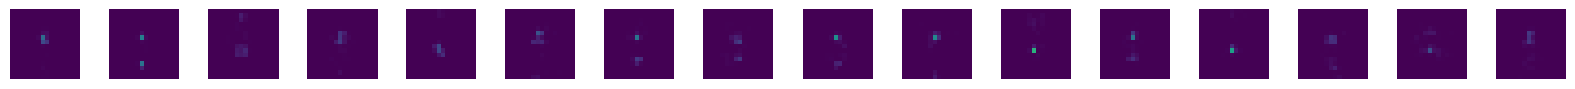

[Epoch 63/100] [D loss: 0.4583] [G loss: 1.8053] [Validity_loss: 1.2872] 
 [Stat_loss: 0.4272] [NNZ_loss: 0.0909]
Sample feature coding: [ 1.         -1.8798919   0.4919883   0.51164126  0.39578214  0.00927826
  0.03982108  0.00416598  0.02244179]


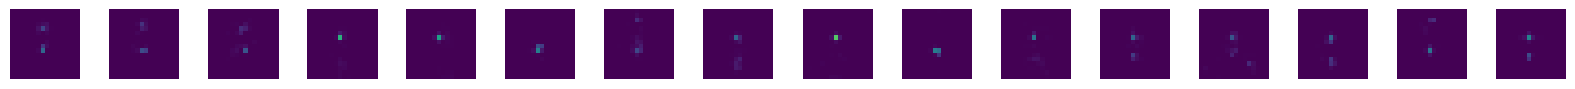

KeyboardInterrupt: 

In [9]:
# Initialize a dictionary to store epoch-wise results
history = {
        'epoch': [],
        'train_loss': [],
        'train_metric': [],
        'val_loss': [],
        'val_metric': []
    }

metric = accuracy

# Training and validation by epoch
for epoch in range(n_epochs):
    # Training loop
    for target, features in train_loader: # All data are normalized in the dataloader
        # Initialize the loss and metric values
        train_loss = 0.0
        train_metric = 0.0

        # DNN Training
        optimizer.zero_grad()
        DNN.train()

        # If multiclass, target is last feature
        target = features[-1]
        # Separate coding features from targets
        features = features[:-2].to(device)

        # Generate classification
        classification = DNN(features)

        bce = nn.BCELoss()
        training_loss = bce(classification, target)

        # Total DNN loss is the val loss times hyperparameter alpha
        alpha = 1
        loss = (alpha*validity_loss)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_metric += metric(outputs, y)

        # Average training loss and metric
        train_loss /= len(train_loader)
        train_metric /= len(train_loader)

        # Validation loop
        DNN.eval()  # Set the model to evaluation mode
        with torch.no_grad():  # Disable gradient calculation
            val_loss = 0.0
            val_metric = 0.0
            for X_val, y_val in val_loader:
                y_val = y_val.to(proper_dtype)
                classification = DNN(X_val)  # Make predictions
                val_loss += bce(classification, y_val).item()  # Compute loss
                val_metric += metric(outputs_val, y_val) # Compute accuracy

            val_loss /= len(val_loader)
            val_metric /= len(val_loader)

        # Append epoch results to history
        history['epoch'].append(epoch)
        history['train_loss'].append(epoch_loss)
        history['train_metric'].append(epoch_metric)
        history['val_loss'].append(val_loss)
        history['val_metric'].append(val_metric)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, '
              f'Train Metric: {epoch_metric:.4f}, Val Loss: {val_loss:.4f}, '
              f'Val Metric: {val_metric:.4f}')

    if epoch % 10 == 0:
        # Save model states and tracked data in a temp file during training
        save_path = f"models/DNN_model_temp.pt"
        torch.save({
            "DNN_state_dict": DNN.state_dict(),
            "losses": losses,
            "stats_dict": stats_dict
        }, save_path)

        print(f"Model and statistics saved to {save_path}")

In [10]:
## Save Model
# Create output directory if it doesn't exist

save = True

if save:
    os.makedirs("models", exist_ok=True)

    # Timestamp for unique filenames
    timestamp = datetime.now().strftime("%m%d_%H%M")
    
    # Save model states and tracked data in a single file
    save_path = f"models/Binary_DNN_{timestamp}.pt"
    torch.save({
        "DNN_state_dict": DNN.state_dict(),
        "discriminator_state_dict": discriminator.state_dict(),
        "losses": losses,
        "stats_dict": stats_dict
    }, save_path)
    
    print(f"Model and statistics saved to {save_path}")

Model and statistics saved to models/class_gan_model_0724_1002.pt
